# Classification Task

# Introduction:
### This public dataset is part of Airbnb
### The dataset can be found on : "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data"

## Description 
### Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import pyodbc
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from scipy import stats

# Data Import

In [3]:
df = pd.read_excel('AB_NYC_2019.xlsx')

In [ ]:
### Preprocess data: 
    1)Explore data, 
    2)check for missing data 
    3)apply data scaling. Justify the type of scaling used.

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
Abishek Choudhrydf.shape

(48895, 16)

# Data Cleaning

##### 67260 null values out of (48895 * 16) = 782320 values across dataset, which is 8%.

In [6]:
# 67260 null values out of (48895 * 16) = 782320 values across dataset, which is 8%.
df.isna().sum()

id                                    0
name                                 26
host_id                               0
host_name                            22
neighbourhood_group                   0
neighbourhood                         0
latitude                          22604
longitude                         22604
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,26291.000000,26291.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.720584,-73.952017,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.058200,0.059901,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.683245,-73.990750,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723940,-73.970760,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.745675,-73.924555,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##### Reading top 5 values

In [8]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,NaN,NaN,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Dropping colums last review,since it has 10052 out of 48895 44% null values

In [9]:
Choudhrydf.drop(['last_review'] , axis = 1 , inplace= True)

#### Replacing all na values in reviews per month with 0

In [10]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [11]:
df.reviews_per_month.isnull().sum()

0

# Data Imputation:

#### imputing null values in latitude and longitude with the help of column neighbourhood_group:

In [12]:
df.groupby('neighbourhood_group')[['latitude', 'longitude']].agg(lambda x:x.value_counts().index[0])

,latitude,longitude
neighbourhood_group,,
Bronx,40.81192,-73.91108
Brooklyn,40.68557,-73.96514
Manhattan,40.72615,-73.98589
Queens,40.74807,-73.90959
Staten Island,40.64497,-74.08645


In [13]:
df[df.isnull().any(axis=1)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,NaN,NaN,Private room,150,3,0,0.00,1,365
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,NaN,NaN,Private room,50,3,242,2.04,3,355
31,9704,Spacious 1 bedroom in luxe building,32045,Teri,Manhattan,Harlem,NaN,NaN,Private room,52,2,88,1.42,1,255
33,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,NaN,NaN,Private room,50,3,273,2.37,3,359
44,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,NaN,NaN,Entire home/apt,150,7,97,0.84,1,309
51,14287,Cozy 1BD on Central Park West in New York City,56094,Joya,Manhattan,Upper West Side,NaN,NaN,Entire home/apt,151,2,73,0.63,1,302
81,19159,Spacious luminous apt Upper West NYC,73051,Sybilla,Manhattan,Harlem,NaN,NaN,Entire home/apt,110,31,54,0.49,1,209
90,20724,Sunny room+Pvte office in huge loft,961342,Augustin,Brooklyn,Bushwick,NaN,NaN,Private room,65,4,24,0.28,1,317
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,NaN,NaN,Entire home/apt,105,3,118,1.05,2,9
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,NaN,NaN,Entire home/apt,140,3,81,0.71,1,198


In [14]:
df.latitude.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['longitude'].isnull() | df['latitude'].isnull())] =  40.72615
df.longitude.loc[(df['neighbourhood_group'] == 'Manhattan') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.98589

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
df.latitude.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['longitude'].isnull() | df['latitude'].isnull())] =  40.68557
df.longitude.loc[(df['neighbourhood_group'] == 'Brooklyn') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.96514

In [16]:
df.latitude.loc[(df['neighbourhood_group'] == 'Queens') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.74807
df.latitude.loc[(df['neighbourhood_group'] == 'Queens') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.90959

In [17]:
df.latitude.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.64497
df.latitude.loc[(df['neighbourhood_group'] == 'Staten Island') & (df['longitude'].isnull() | df['latitude'].isnull())] = -74.08645

In [18]:
df.latitude.loc[(df['neighbourhood_group'] == 'Bronx') & (df['longitude'].isnull() | df['latitude'].isnull())] = 40.81192
df.latitude.loc[(df['neighbourhood_group'] == 'Bronx') & (df['longitude'].isnull() | df['latitude'].isnull())] = -73.91108

In [19]:
df.dropna(inplace = True)

In [20]:
# rechecking for any na values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
Abishek Choudhry# new shape of the cleaned dataset
df.shape

(48847, 15)

# Data Visualization:

#### Using Correlation matrix to check for any correlated independent variables that may cause multicollinearuty problem
#### There are no highly correlated independent variables 

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

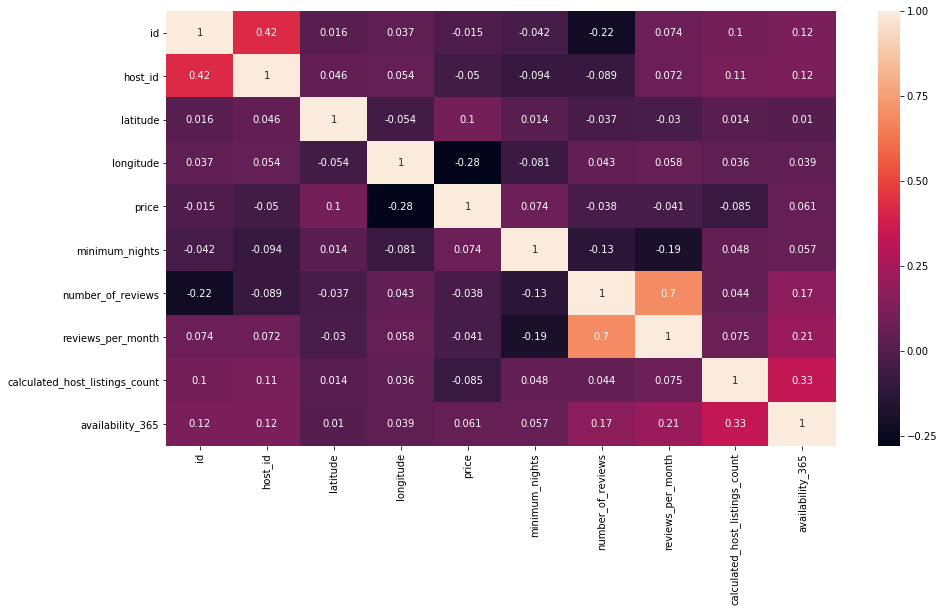

In [22]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns


Text(0.5, 1.0, 'Neighbourhood Group')

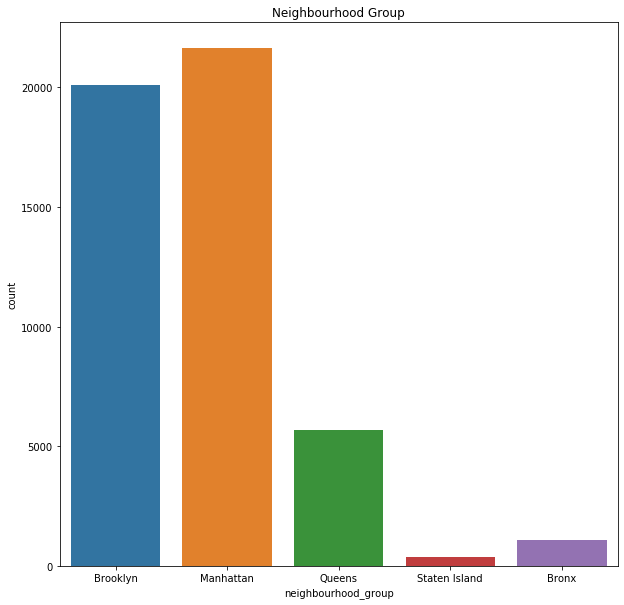

In [23]:
Abishek Choudhrysns.countplot(df['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')


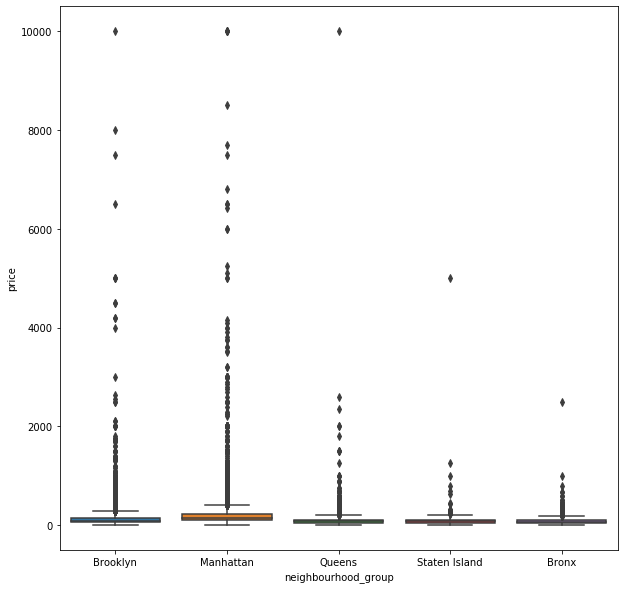

In [24]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='price')

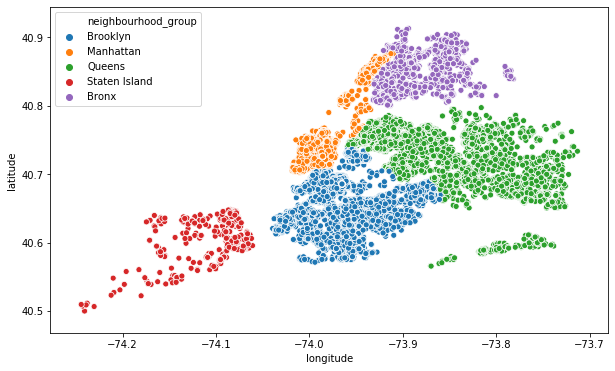

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [26]:
# top 10 hosts:
top_hosts=df.host_id.value_counts()[:10]
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: host_id, dtype: int64

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '1475015')]

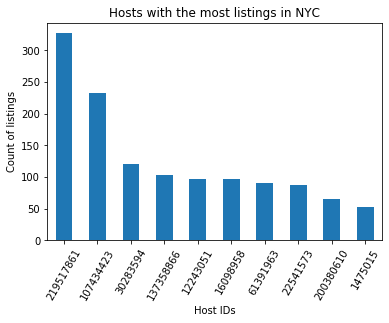

In [27]:
Abishek Choudhryviz=top_hosts.plot(kind='bar')
viz.set_title('Hosts with the most listings in NYC')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host IDs')
viz.set_xticklabels(viz.get_xticklabels(), rotation=60)

In [28]:
# price distribution accross different neighbourhood groups:
df.pivot_table(index = 'neighbourhood_group', values ='price', aggfunc= ('min','max', np.mean))

,max,mean,min
neighbourhood_group,,,
Bronx,2500.0,87.469238,0.0
Brooklyn,10000.0,124.432975,0.0
Manhattan,10000.0,196.911275,0.0
Queens,10000.0,99.527106,10.0
Staten Island,5000.0,114.812332,13.0


In [29]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.72615,-73.98589,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

### Checking skewness of price variable by seeing mean, median

In [31]:
df['price'].mean()

152.75705775175547

In [32]:
df['price'].min()

0

In [33]:
df['price'].median()

106.0

### Taking mean of price, after removing outliers:

In [34]:
df.price[((df.price - df.price.mean()) / df.price.std()).abs() < 3].mean()

138.76972285849894

### Target variable - all price greater than mean = 1, all price value less than mean as 0, for the purpose of classification

In [35]:
df['target'] = 0

In [36]:
df.loc[df['price'] > 139, 'target'] = 1


In [37]:
# Checking distribution of target variable:
df.target.value_counts()

0    30499
1    18348
Name: target, dtype: int64

In [38]:
Abishek Choudhry#### Creating dummy variables for 'neighbourhood_group' and 'room_type' variables that are categorical for the purpose of building models:

In [39]:
neighbourhood_category=pd.get_dummies(df['neighbourhood_group'],columns='neighbourhood_group',prefix='neighbourhood_group')
df=pd.concat([df, neighbourhood_category], axis=1)
df.drop(['neighbourhood_group'],axis=1,inplace= True)

In [40]:
room_category=pd.get_dummies(df['room_type'],columns='room_type',prefix='room_type')
df=pd.concat([df, room_category], axis=1)
df.drop(['room_type'],axis=1,inplace= True)

#### Checking columns in modified dataframe:

In [41]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'target', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [42]:
df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.6475,40.7536,40.7261,40.6851,40.7985
longitude,-73.9724,-73.9838,-73.9859,-73.9598,-73.944
price,149,225,150,89,80
minimum_nights,1,1,3,1,10
number_of_reviews,9,45,0,270,9


#### assigning target variable to y

In [43]:
y = df[['target']]

#### Dropping redundant such as : 'latitude', 'longitude', 'price', 'calculated_host_listings_count', 'number_of_reviews', 'neighbourhood' 
#### and insignificant variables such as : 'id', 'name', 'host_id', 'host_name'

In [44]:
Abishek Choudhryx = df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'price', 'calculated_host_listings_count', 'number_of_reviews', 'neighbourhood', 'target'], axis = 1)

In [45]:
Abishek Choudhryx.head().T

,0,1,2,3,4
minimum_nights,1.00,1.00,3.0,1.00,10.0
reviews_per_month,0.21,0.38,0.0,4.64,0.1
availability_365,365.00,355.00,365.0,194.00,0.0
neighbourhood_group_Bronx,0.00,0.00,0.0,0.00,0.0
neighbourhood_group_Brooklyn,1.00,0.00,0.0,1.00,0.0
neighbourhood_group_Manhattan,0.00,1.00,1.0,0.00,1.0
neighbourhood_group_Queens,0.00,0.00,0.0,0.00,0.0
neighbourhood_group_Staten Island,0.00,0.00,0.0,0.00,0.0
room_type_Entire home/apt,0.00,1.00,0.0,1.00,1.0
room_type_Private room,1.00,0.00,1.0,0.00,0.0


# 1) KNN Classifier

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
np.random.seed(0)
from sklearn.neighbors import KNeighborsRegressor

### MinMaxScaler preserves the shape of the original distribution, hence we are using MinMax scler here. 
Scaling with min max as we have a alot of outliers it is best to scale entire dataset to end up with smaller standard deviations, which can suppress the effect of outliers.

In [47]:
## KNN Classifier:

In [139]:
x_train_org, x_test_org, y_train, y_test = train_test_split(x,y, random_state = 0)

In [140]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_org)
x_test = scaler.transform(x_test_org)

In [141]:
%matplotlib inline
train_score_array = []
test_score_array = []

In [142]:
for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(x_train, y_train)
    train_score_array.append(knn_reg.score(x_train, y_train))
    test_score_array.append(knn_reg.score(x_test, y_test))

Text(0, 0.5, 'MSE')

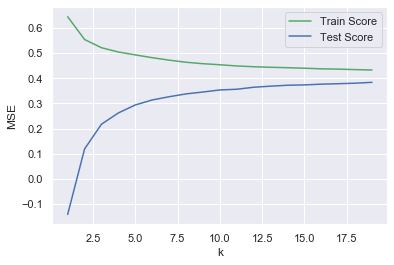

In [143]:
x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [195]:
knn_reg = KNeighborsRegressor(17)
knn_reg.fit(x_train, y_train)
print('Train score: {:.4f}'.format(knn_reg.score(x_train, y_train)))
print('test score: {:.4f}'.format(knn_reg.score(x_test, y_test)))

Train score: 0.4361
test score: 0.3782


In [147]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn_reg , x_train, y_train, cv=kfold)))
scores = cross_val_score(knn_reg , x_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.35537644 0.3726536  0.35376569 0.3464283  0.36048789 0.3602614 ]
0.358162219674475


In [148]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn_reg = KNeighborsClassifier(2)
knn_reg.fit(x_train, y_train)
ypred = knn_reg.predict(x_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


[[6805 2527]
 [ 781 2099]]
0.5592859046096457


## Summary of KNN Classifier:

##### Train score:0.4361
##### Test score:0.3782
##### Average cross validation score: 0.358
##### Best Parameter : number of neighbours : k = 17
##### F1 score : 0.5592859046096457

## 2)Decision Tree

In [182]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)
X_train = scaler.fit_transform(X_train_org)
X_tets = scaler.transform(X_test_org)

In [183]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint 
param_grid = {'max_depth': np.arange(2, 11) , 'min_samples_split' : np.arange(2, 15)}
grid3 = GridSearchCV(DecisionTreeClassifier(random_state = 24), param_grid, cv = 5, return_train_score= True, iid = False, 
                    scoring = 'recall')

In [184]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=24,
                                              splitter='best'),
             iid=False, n_jobs=None,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,

In [185]:
print(grid3.best_score_)
print(grid3.best_params_)

0.8325319823479743
{'max_depth': 3, 'min_samples_split': 2}


In [186]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix

y_train_pred = grid3.predict(X_train)
confusion_matrix(y_train, y_train_pred)

array([[17214,  5699],
       [ 2298, 11424]], dtype=int64)

In [187]:
roc_auc_score(y_train, y_train_pred)

0.7919041344027297

In [188]:
from sklearn.metrics import roc_curve
y_train_prob = grid3.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,0])
threshold

array([1.96664413, 0.96664413, 0.91172708, 0.84295533, 0.64648438,
       0.64303927, 0.472373  , 0.29553265, 0.16890403])

Text(0, 0.5, 'TPR')

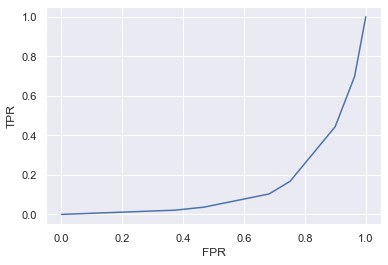

In [189]:
%matplotlib inline

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [155]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [170]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [163]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

clf = DecisionTreeClassifier(random_state=0)
ch = pd.DataFrame(df,  columns=['minimum_nights', 'reviews_per_month', 'availability_365',
       'neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn',
       'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens',
       'neighbourhood_group_Staten Island', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room'])
clf = clf.fit(ch, df.target) 

In [165]:
print(dict(zip(x.columns, clf.feature_importances_)))


{'minimum_nights': 0.08416292408210203, 'reviews_per_month': 0.23561297010194782, 'availability_365': 0.20986251131469819, 'neighbourhood_group_Bronx': 0.0012051902836115794, 'neighbourhood_group_Brooklyn': 0.008381349368503018, 'neighbourhood_group_Manhattan': 0.060833886493804716, 'neighbourhood_group_Queens': 0.002721249693245086, 'neighbourhood_group_Staten Island': 0.0009207612335617907, 'room_type_Entire home/apt': 0.3926295731066731, 'room_type_Private room': 0.0028771544925750184, 'room_type_Shared room': 0.0007924298292776861}


## Summary of Decision Tree Classifier:

##### Train score:0.83
##### Test score: 0.79
##### Average cross validation score: 0.82
##### Best Parameter : max depth = 3
##### F1 score : 0.5592859046096457

# 3)Logistic Regression

In [63]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [64]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

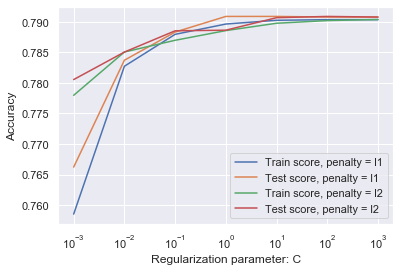

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [57]:
log_l2 = LogisticRegression(penalty = 'l2', C = 10)
#log_l1.fit(X_train, y_train)
log_l2.fit(X_train, y_train)
print(log_l2.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l2.score(X_test, y_test))

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7899549611027705
0.7906157877497544


In [58]:
log_l1 = LogisticRegression(penalty = 'l1', C = 1)
log_l1.fit(X_train, y_train)
#log_l2.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
#test_score_l1.append(log_l1.score(X_test, y_test))
print(log_l1.score(X_test, y_test))

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7899276648014194
0.7909433344251556


In [60]:
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001,0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, random_state=0)
grid_search.fit(X_train1, y_train1)

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a sol

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [61]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.79


In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_l1 = LogisticRegression(penalty = 'l1', C = 10)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Cross-validation scores:
[0.78796254 0.79026562 0.79118686 0.78995854 0.787809   0.79084767]


C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

0.7896972938140602


C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 10)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.71406578026592
[[5176 1154]
 [ 889 2551]]


C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Summary of Logistic Regression:

##### Train score:0.7894
##### Test score:0.7129
##### Average cross validation score : 0.7896
##### Best Parameter : penalty : C': 1
##### F1 score : 0.71406578026592


# 4)Kernel SVC

In [190]:
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC

In [191]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [192]:
X_train_org, X_test_org, y_train, y_test = train_test_split(x, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

svc = SVC(kernel = 'rbf', C = 0.1, gamma = 10)
svc.fit(X_train, y_train)

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [198]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(x,y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 27476   size of validation set: 9159   size of test set: 12212



C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A 

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A 

Best score on validation set: 0.79
Best parameters:  {'C': 10, 'gamma': 0.01}
Test set score with best parameters: 0.79


## Summary of SVC kernel:

##### Train score:0.79
##### Test score:0.79
##### Best Parameter :C': 10, 'gamma': 0.01
##### Best Cross validation score: 0.79


# 5)Linear SVC 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
from sklearn.svm import SVC

train = []
test = []
index = []

for C in [0.1, 1, 10]:
        #create the model
        svc = SVC(kernel = 'linear', C = C)
        
        #train the model
        svc.fit(X_train, y_train)
        
        #evaluate the model
        train.append(svc.score(X_train, y_train))
        test.append(svc.score(X_test, y_test))
        index.append((C))

C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mokumar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(train)
print(test)

In [ ]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [ 0.1, 1, 10]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 10)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

In [ ]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 10 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

In [ ]:
## Summary of SVC linear:

##### Train score:
##### Test score:
##### Average cross validation score
##### Best Parameter :
##### F1 score : 

# Summary of Classification model:

### Model selection:
## Decision Tree is the best model with 
## Test score: 0.79
## Average cross validation score: 0.82
## Best Parameter : max depth = 3
## F1 score : 0.5592859046096457
